<center><img src='TSF.png',height="300"></center>


# <center><font color=15D77D>Task 6 : Exploratory Data Analysis - Terrorism</font></center>
### <center><font color=166E64>Problem Statement: </font><font color=AB3988>As a security/defense analyst, try to find out the hot zone of terrorism.</font>

### <center><font color=166E64>Author </font><font color=15D77D>: </font><font color=5B1746>Hrishikesh Sharad Malkar</font></center>

### Importing Libraries

In [1]:
import pandas as pd
#import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import math


Bad key "text.kerning_factor" on line 4 in
C:\Users\HRISHIKESH\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
C:\Users\HRISHIKESH\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Reading Dataset

In [2]:
# reading dataset
df = pd.read_csv('../data/GTD.csv',encoding='ISO-8859-1')

In [3]:
# Preview of data
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
#Shape of data
df.shape

(181691, 135)

### Data Pre-processing

In [58]:
# renaming columns
df.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [6]:
# extracting only required features
df=df[['Year','Month','Extended','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [7]:
# preview after extracting features
df.head()

,Year,Month,Extended,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
# current shape of data
df.shape

(181691, 19)

In [9]:
# Finding no of null values
df.isnull().sum()

Year                0
Month               0
Extended            0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Extended     181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   state        181270 non-null  object 
 6   Region       181691 non-null  object 
 7   city         181257 non-null  object 
 8   latitude     177135 non-null  float64
 9   longitude    177134 non-null  float64
 10  AttackType   181691 non-null  object 
 11  Killed       171378 non-null  float64
 12  Wounded      165380 non-null  float64
 13  Target       181055 non-null  object 
 14  Summary      115562 non-null  object 
 15  Group        181691 non-null  object 
 16  Target_type  181691 non-null  object 
 17  Weapon_type  181691 non-null  object 
 18  Motive       50561 non-n

### EDA

#### Correlation

Text(0.5, 1, 'Correlation Matrix (Data)')

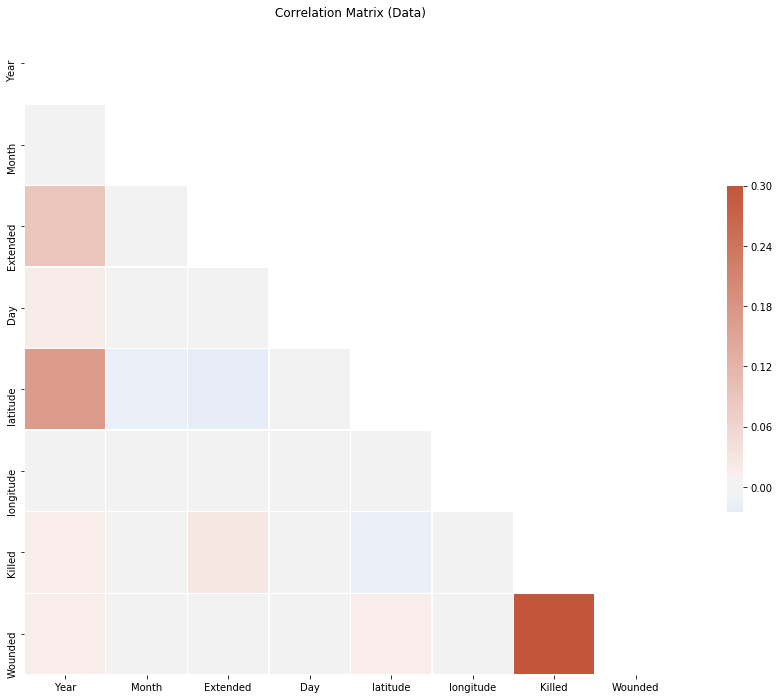

In [16]:
a = df.corr()
mask = np.triu(np.ones_like(a, dtype=bool))
f, ax = plt.subplots(figsize=(18, 12))
cmap = sns.diverging_palette(250, 20, as_cmap=True)
sns.heatmap(a, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix (Data)")

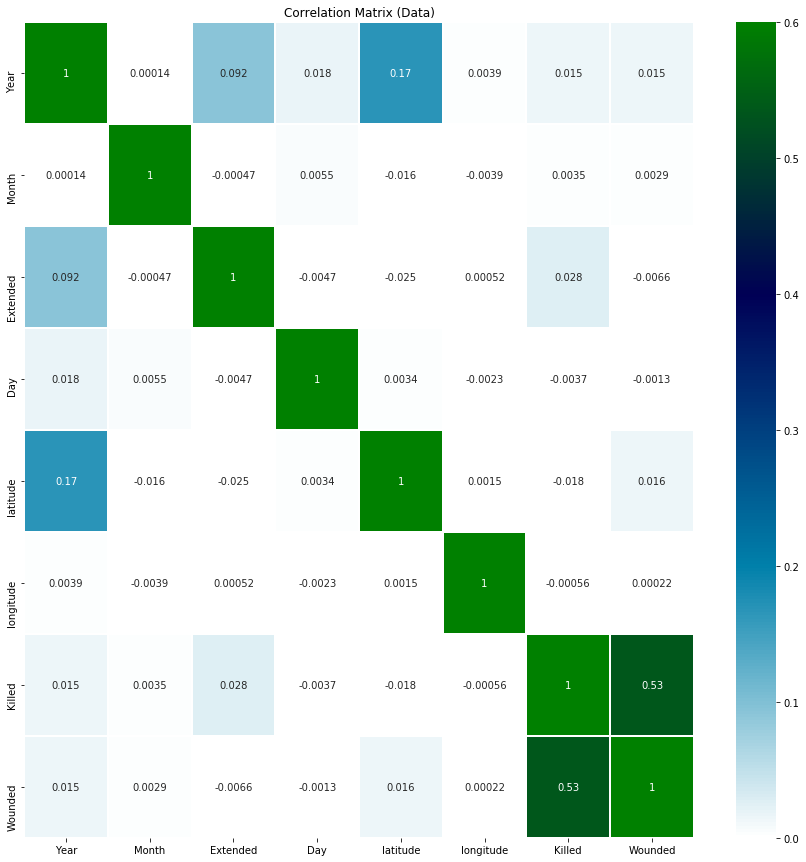

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(a, annot=True, annot_kws={"size": 10}, linewidths=1, vmin=0, vmax=0.6, cmap='ocean_r')
plt.title("Correlation Matrix (Data)")
plt.show() #let's make it clear.

#### Countries with most attacks

In [14]:
# Top 10 Countries with most attacks.
print("Country with the most attacks: \n",df['Country'].value_counts().head(10))

Country with the most attacks: 
 Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64


In [15]:
df['Country'].value_counts().idxmax()

'Iraq'

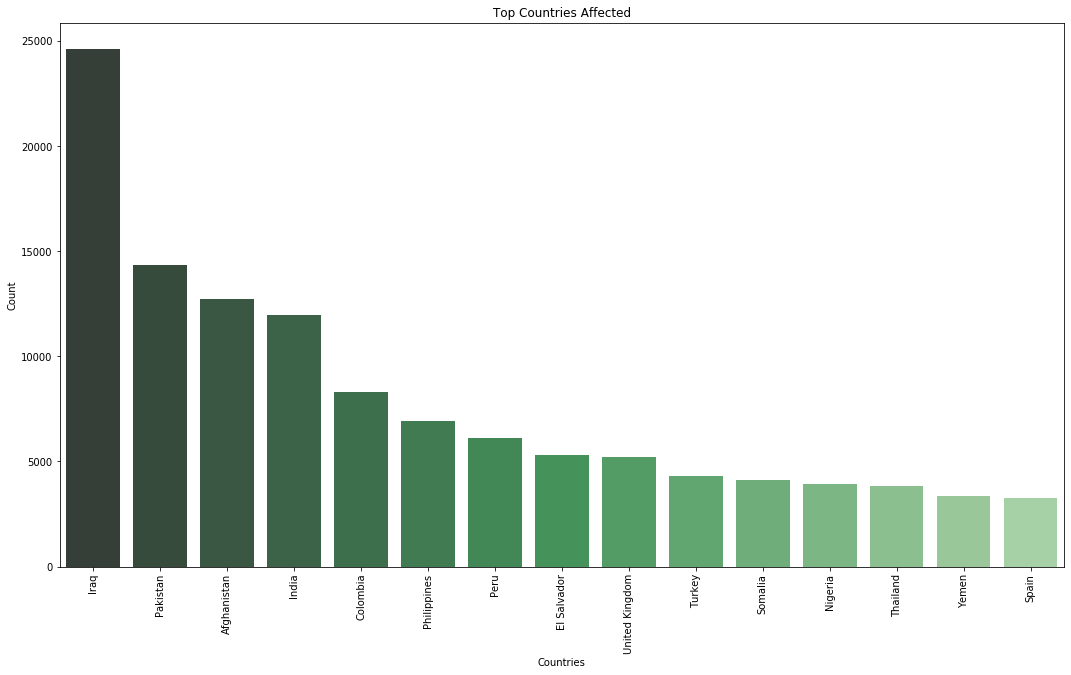

In [17]:
#Top Countries affected by Terror Attacks¶

plt.subplots(figsize=(18,10))
sns.barplot(df['Country'].value_counts()[:15].index,df['Country'].value_counts()[:15].values,palette='Greens_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

#### City with most attacks

In [18]:
print("City with the most attacks:\n",df['city'].value_counts())

City with the most attacks:
 Unknown             9775
Baghdad             7589
Karachi             2652
Lima                2359
Mosul               2265
                    ... 
Besikduzu              1
Dera bugti             1
Lampagang              1
Pattani district       1
Qalandar               1
Name: city, Length: 36674, dtype: int64


>Note:here you will notice that first city is unknown, so there is no use to take that value into consideration.

In [19]:
print("City with the most attacks:",df['city'].value_counts().index[1]) #as first entry is 'unknown'

City with the most attacks: Baghdad


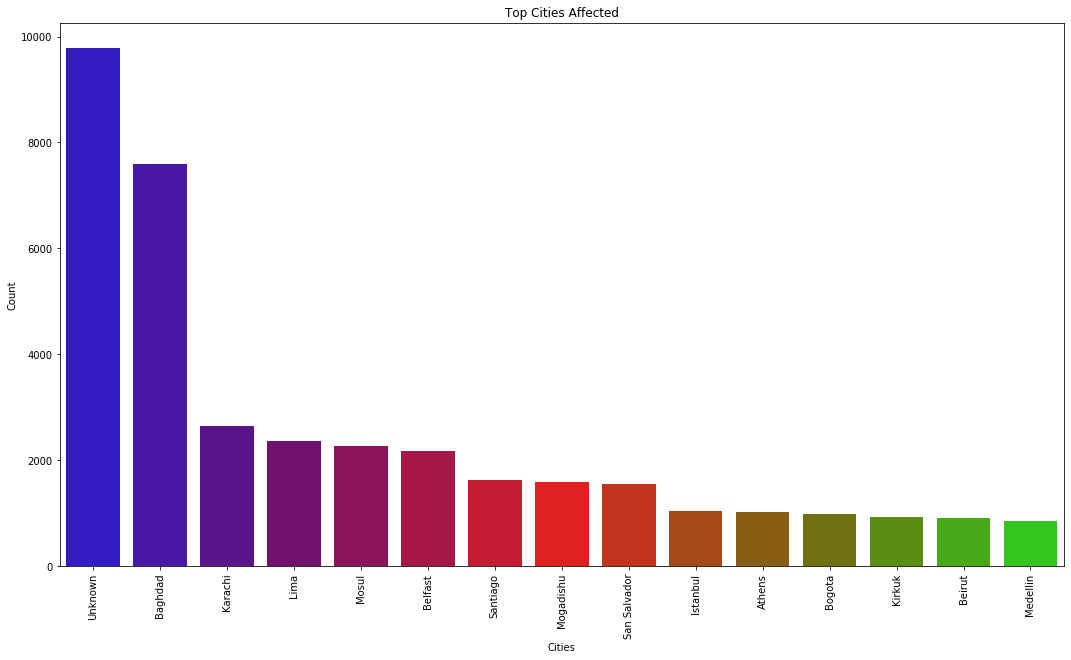

In [20]:
#Top Cities affected by Terror Attacks¶

plt.subplots(figsize=(18,10))
sns.barplot(df['city'].value_counts()[:15].index,df['city'].value_counts()[:15].values,palette='brg')
plt.title('Top Cities Affected')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

#### Region with most attacks

In [21]:
print("Region with the most attacks: \n",df['Region'].value_counts())

Region with the most attacks: 
 Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64


In [22]:
print("Region with the most attacks:",df['Region'].value_counts().idxmax())

Region with the most attacks: Middle East & North Africa


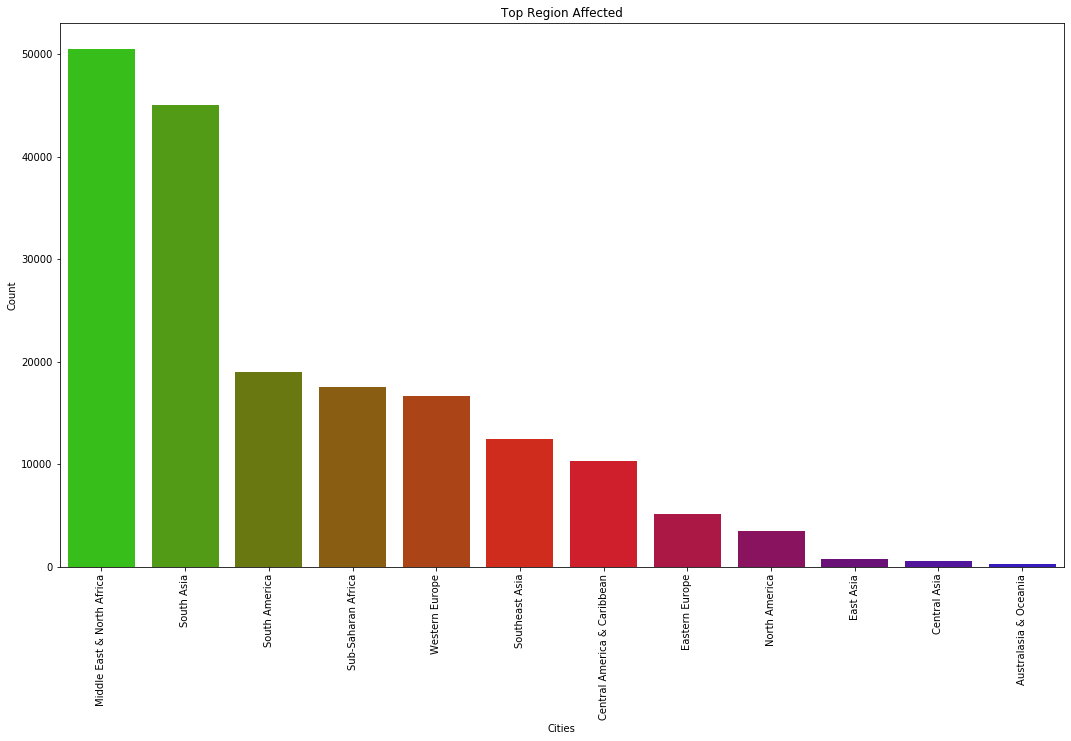

In [24]:
#Top Regions affected by Terror Attacks¶

plt.subplots(figsize=(18,10))
sns.barplot(df['Region'].value_counts()[:15].index,df['Region'].value_counts()[:15].values,palette='brg_r')
plt.title('Top Region Affected')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

#### Terrorist Activities by Region in each Year through Area Plot

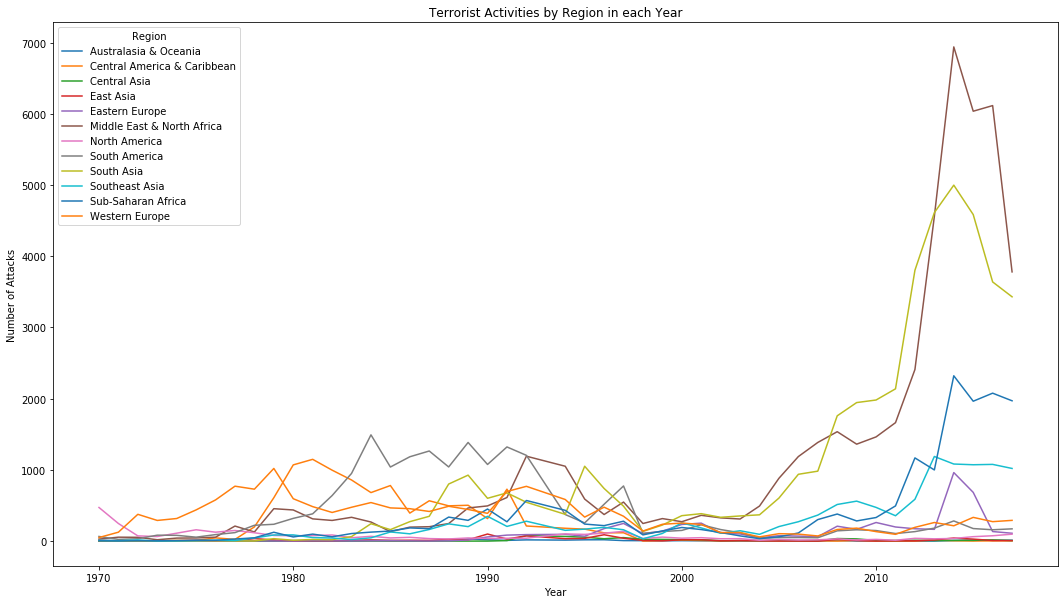

In [25]:
pd.crosstab(df.Year, df.Region).plot(kind='line',figsize=(18,10))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

#### Year with most attacks

In [26]:
print("Year with the most attacks:\n",df['Year'].value_counts().head(10))

Year with the most attacks:
 2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: Year, dtype: int64


In [27]:
print("Year with the most attacks:",df['Year'].value_counts().idxmax())

Year with the most attacks: 2014


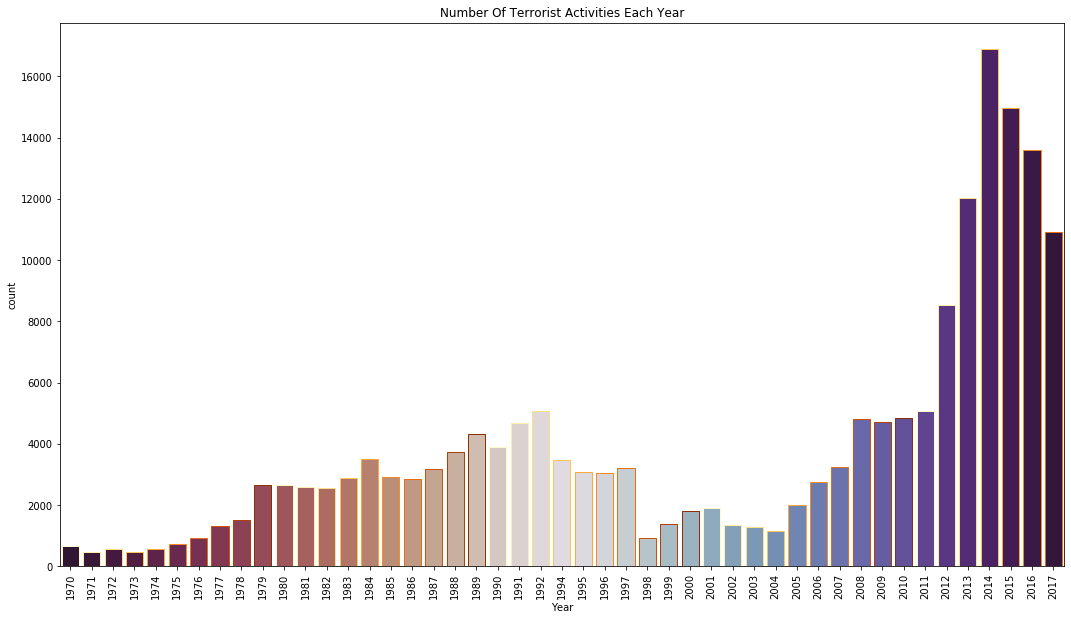

In [28]:
#Number of Terrorist Activities each Year

plt.subplots(figsize=(18,10))
sns.countplot('Year',data=df,palette="twilight_shifted_r",edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

#### Month with the most attacks

In [29]:
print("Month with the most attacks:\n",df['Month'].value_counts())

Month with the most attacks:
 5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: Month, dtype: int64


In [30]:
print("Month with the most attacks:",df['Month'].value_counts().idxmax())

Month with the most attacks: 5


#### Group with most attacks

In [31]:
print("Group with the most attacks:\n",df['Group'].value_counts().head())

Group with the most attacks:
 Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Name: Group, dtype: int64


In [32]:
print("Group with the most attacks:",df['Group'].value_counts().index[1])

Group with the most attacks: Taliban


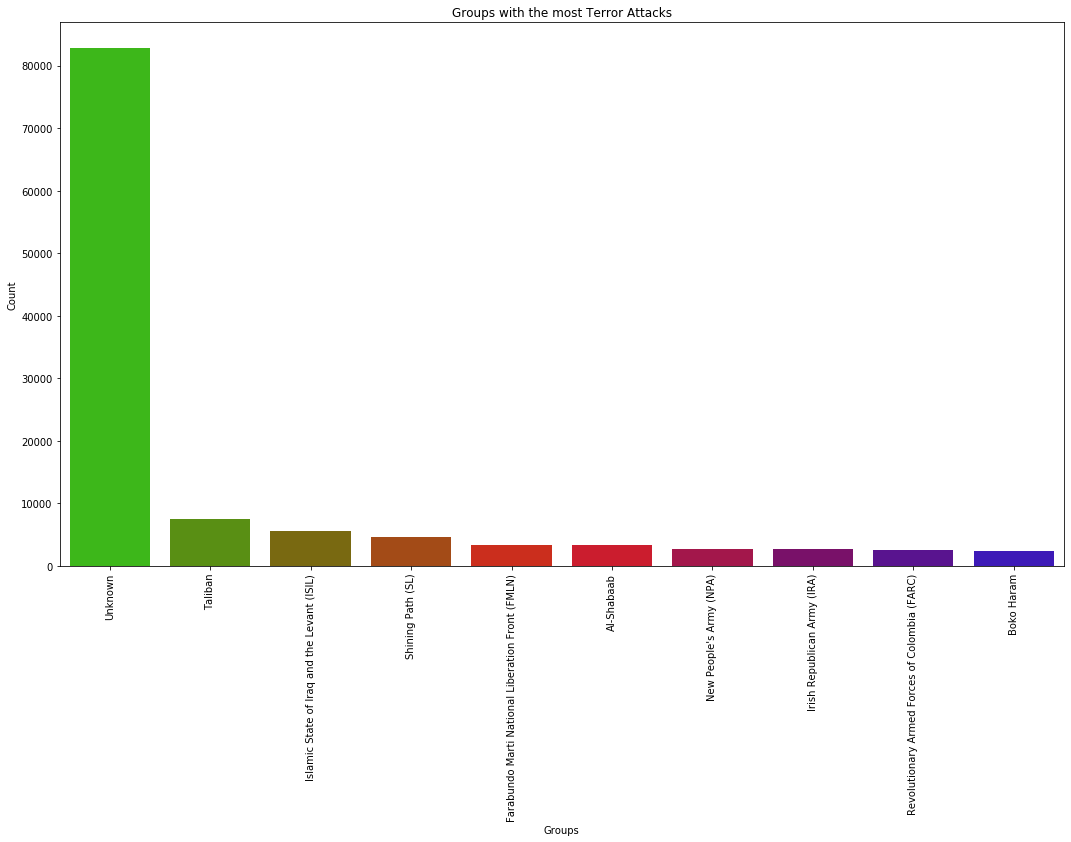

In [33]:
#Top Groups with the most Terror Attacks¶

plt.subplots(figsize=(18,10))
sns.barplot(df['Group'].value_counts()[:10].index,df['Group'].value_counts()[:10],palette='brg_r')
plt.title('Groups with the most Terror Attacks')
plt.xlabel('Groups')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

#### Types of attacks

In [34]:
print("Most Attack Types:\n",df['AttackType'].value_counts())

Most Attack Types:
 Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64


In [35]:
print("Most Attack Types:",df['AttackType'].value_counts().idxmax())

Most Attack Types: Bombing/Explosion


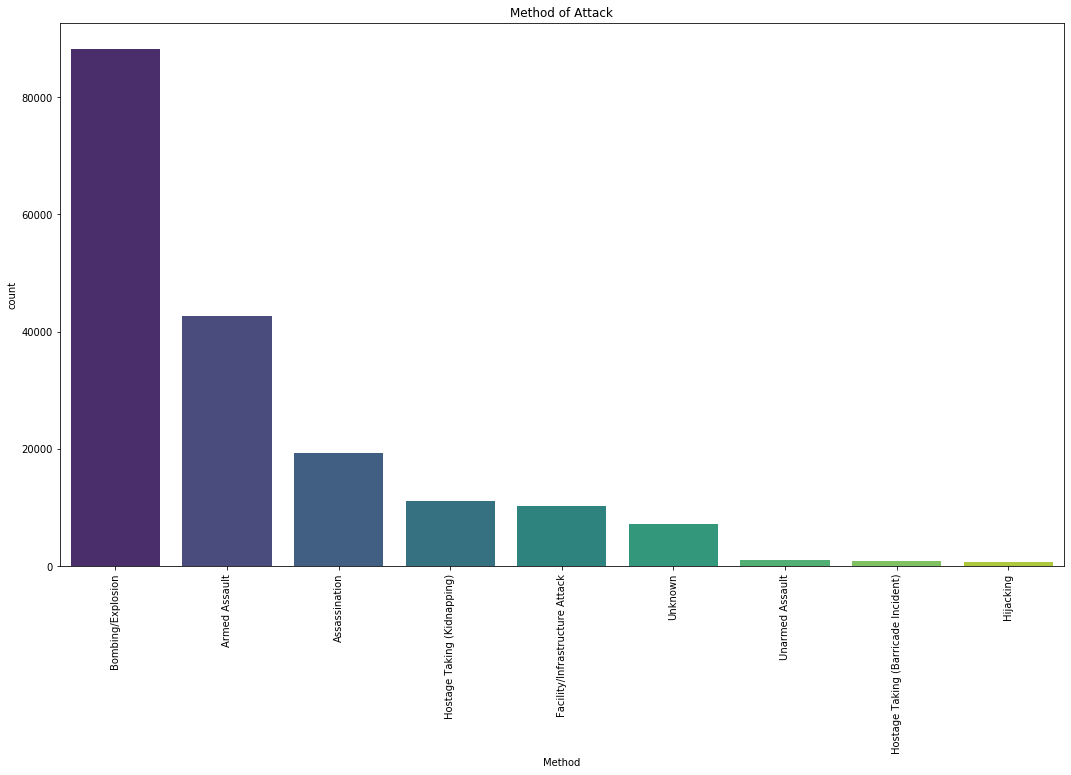

In [37]:
#Methods of attack

plt.figure(figsize=(18,10))
sns.countplot(df['AttackType'],data=df,order=df['AttackType'].value_counts().index,
              palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Method of Attack')
plt.show()

#### The history of the Worst Terror Attacks

In [38]:
df['Wounded'] =df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['casualities'] = df['Killed'] + df['Wounded']

In [39]:
#Values are sorted by the top 40 worst terror attacks as to keep the heatmap simple and easy to visualize

df1 = df.sort_values(by='casualities',ascending=False)[:40]

In [40]:
heat=df1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [41]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

#### Most terrorist attacks as per Country and region

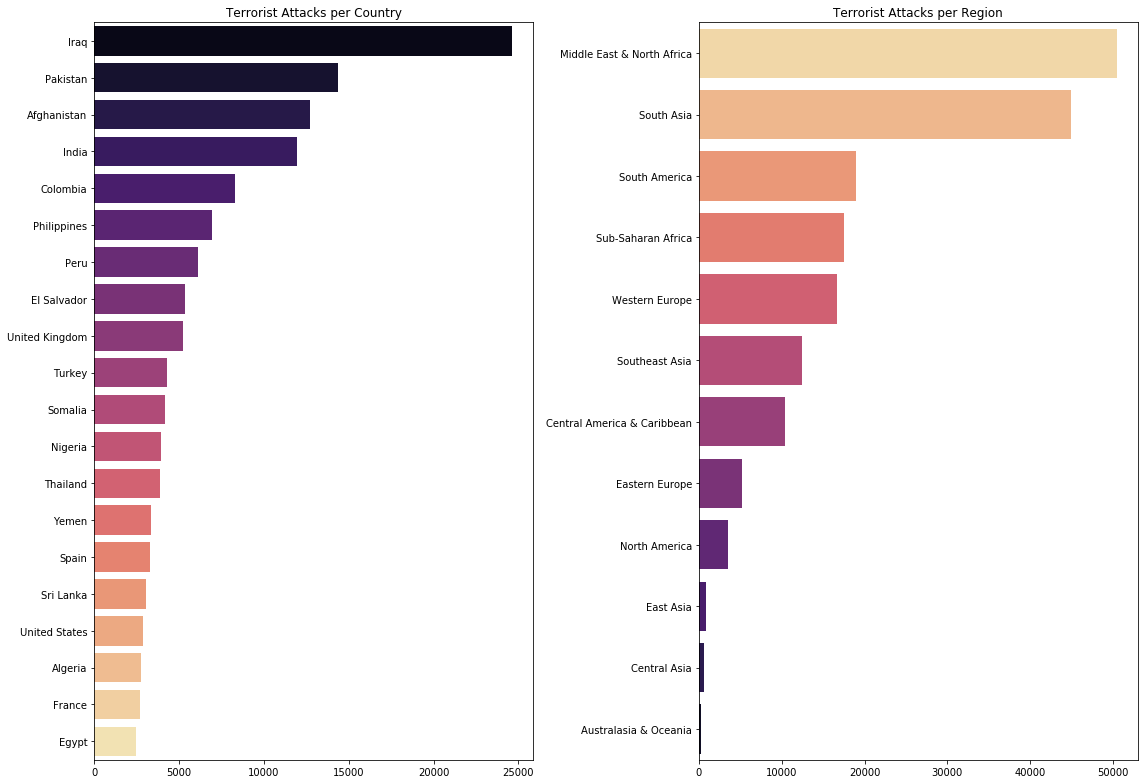

In [42]:
fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x = df['Country'].value_counts()[:20].values, y = df['Country'].value_counts()[:20].index, 
            ax=axes[0],palette = 'magma');
axes[0].set_title('Terrorist Attacks per Country')
sns.barplot(x=df['Region'].value_counts().values,y=df['Region'].value_counts().index,
            ax=axes[1],palette = 'magma_r')
axes[1].set_title('Terrorist Attacks per Region')
fig.tight_layout()
plt.show()

#### Most active organizations and Most affected targets

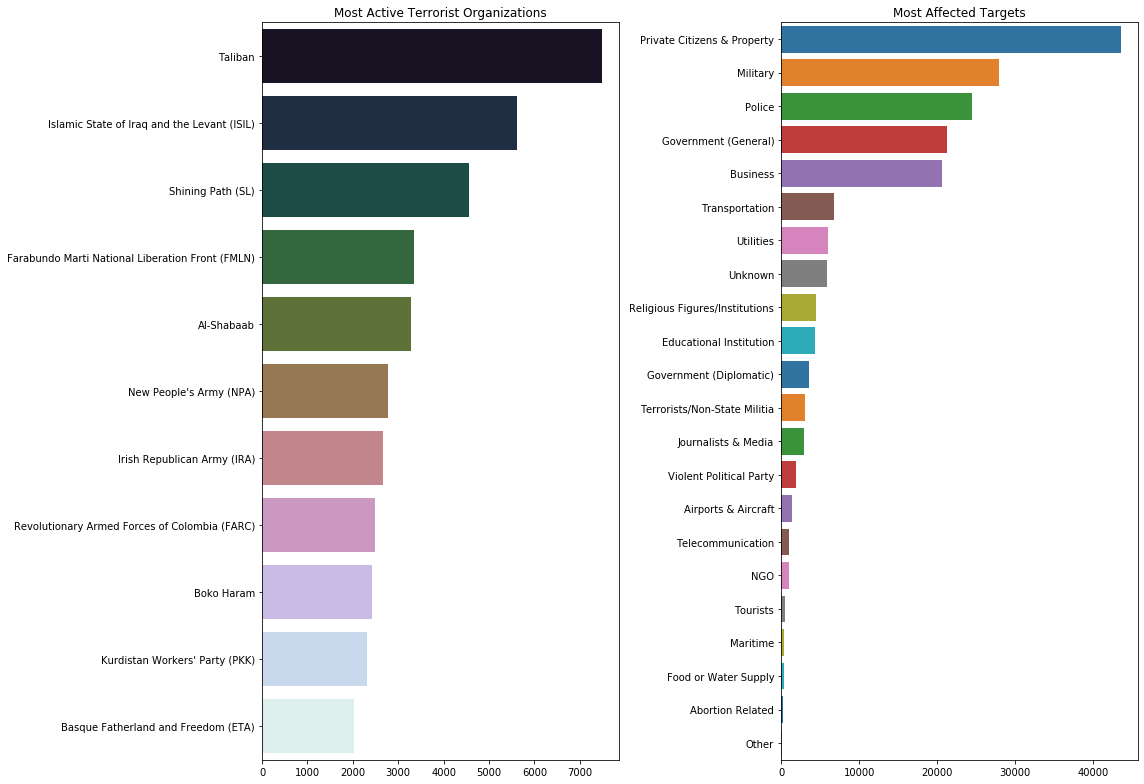

In [43]:
fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(y=df['Group'].value_counts()[1:12].index,x=df['Group'].value_counts()[1:12].values,ax=axes[0], palette='cubehelix')
axes[0].set_title('Most Active Terrorist Organizations')

#Most affected targets
sns.barplot(y=df['Target_type'].value_counts().index,x=df['Target_type'].value_counts().values,ax=axes[1],palette='tab10')
axes[1].set_title('Most Affected Targets')
fig.tight_layout()
plt.show()

#### Before and after the War on Terror

>After the 9/11 attacks in New York City, the US-led War on Terror was launched with the goal to distinguish terrorism primarily in the Middle East. Here, it is shown as a turning point for activity patterns in each region.


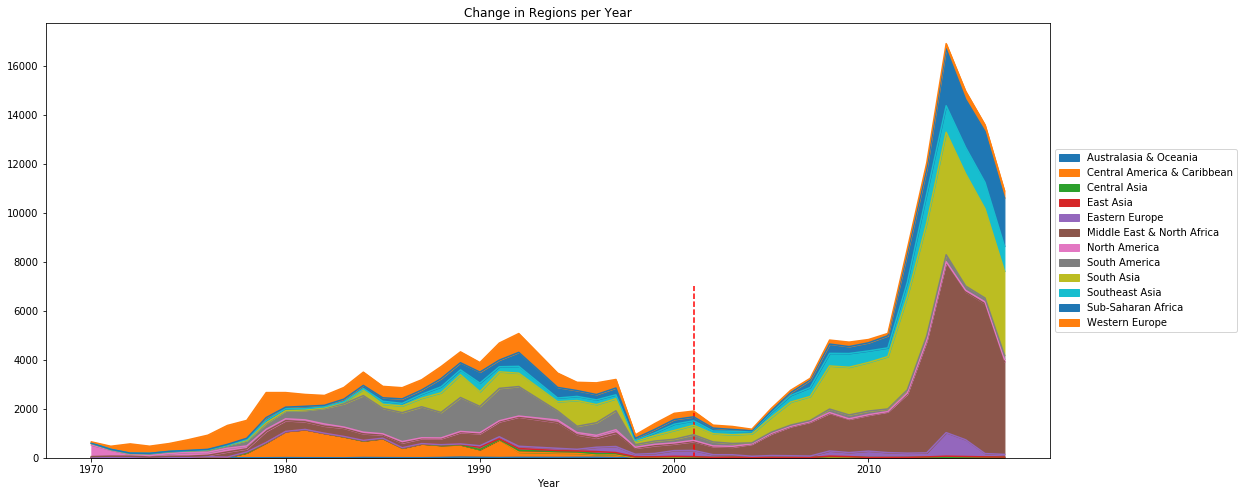

In [44]:
df_after = df[df['Year']>=2001]
pd.crosstab(df.Year,df.Region).plot(kind='area',figsize=(18,8))
plt.title('Change in Regions per Year')
plt.legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.vlines(x=2001,ymin=0,ymax=7000,colors='red',linestyles='--')

>From the This plot, it is very noticeable that the terrorism landscape before and after the War on Terror is vastly different. Before 2001, the regions were much closer together in terms of activity, eventually all dropping to a minimum in 2000.

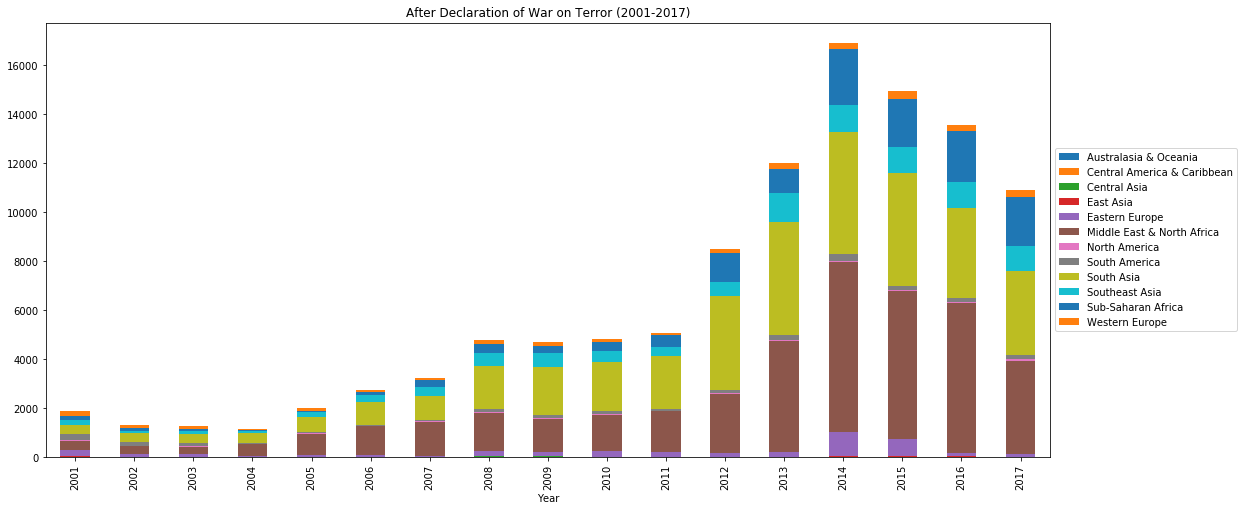

In [45]:
pd.crosstab(df_after.Year,df_after.Region).plot.bar(stacked=True,figsize=(18,8))
plt.title('After Declaration of War on Terror (2001-2017)')
plt.legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.show()

>>From the This plot, it is very noticeable that after 2001, the Middle East and South Asia have dictated the rise in terrorism numbers, with a significant increase in Sub-Saharan Africa as well.

#### The change in shift from Western Europe to Eastern Europe over the years


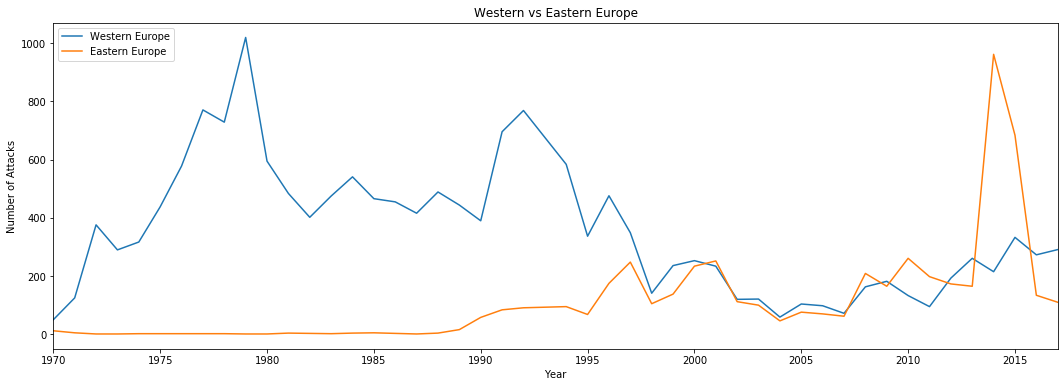

In [46]:
fig,axes = plt.subplots(figsize=(18,6))
sns.lineplot(df[df['Region']=='Western Europe']['Year'].value_counts().index,
             df[df['Region']=='Western Europe']['Year'].value_counts().values)
sns.lineplot(df[df['Region']=='Eastern Europe']['Year'].value_counts().index,
             df[df['Region']=='Eastern Europe']['Year'].value_counts().values)
plt.xlabel('Year')
plt.xticks(np.arange(1970,2017,5))
plt.xlim(1970,2017)
plt.ylabel('Number of Attacks')
plt.title('Western vs Eastern Europe')
axes.legend(labels=['Western Europe','Eastern Europe'])
plt.show()

>Though Western Europe has noticed considerably more terrorism in history, there is now a change in activity towards the east. 1991 seems to be a turning point here regarding the dissolution of the Soviet Union at the time and the various accounts of unrest that followed. The spike in 2014 can be connected to the Ukrainian revolution and related Ukrainian-Russian fights such as the war in Donbas.

#### Comparison of no. attacks between Russia and Ukraine v/s Rest of Eastern Europe

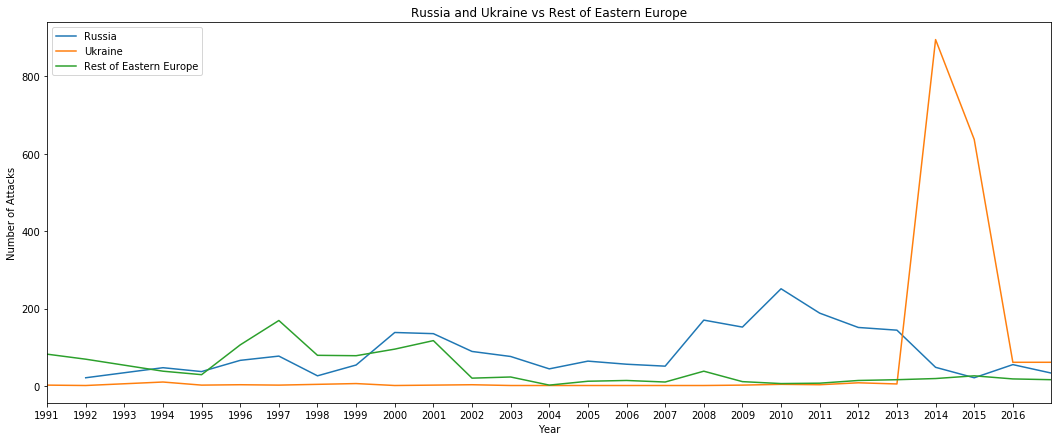

In [63]:
fig,ax = plt.subplots(figsize=(18,7))
russia = df[(df['Country']=='Russia') & (df['Year'].between(1991,2017,inclusive=True))]['Year'].value_counts()
ukraine = df[(df['Country']=='Ukraine') & (df['Year'].between(1991,2017,inclusive=True))]['Year'].value_counts()
rest_east = df[(df['Country']!='Russia') & (df['Country']!='Ukraine') & (df['Region']=='Eastern Europe') & (df['Year'].between(1991,2017,inclusive=True))]['Year'].value_counts()
sns.lineplot(x=russia.index,y=russia.values)
sns.lineplot(x=ukraine.index,y=ukraine.values)
sns.lineplot(x=rest_east.index,y=rest_east.values)
plt.xticks(np.arange(1991,2017,1))
plt.xlim(1991,2017)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Russia and Ukraine vs Rest of Eastern Europe')
ax.legend(labels=['Russia','Ukraine','Rest of Eastern Europe'])
plt.show()

Russia and Ukraine are the main contributors to this  Shift change. Ukraine's isolated spike in 2014 shown here is nearly identical to the previous plot. A large majority of Eastern European terrorism in the past couple of years has been found in Ukraine.


#### Are extended attacks more harmful?
Extended attacks are defined as events that last longer than 24 hours. 

#### Number of extended and unextended attacks 

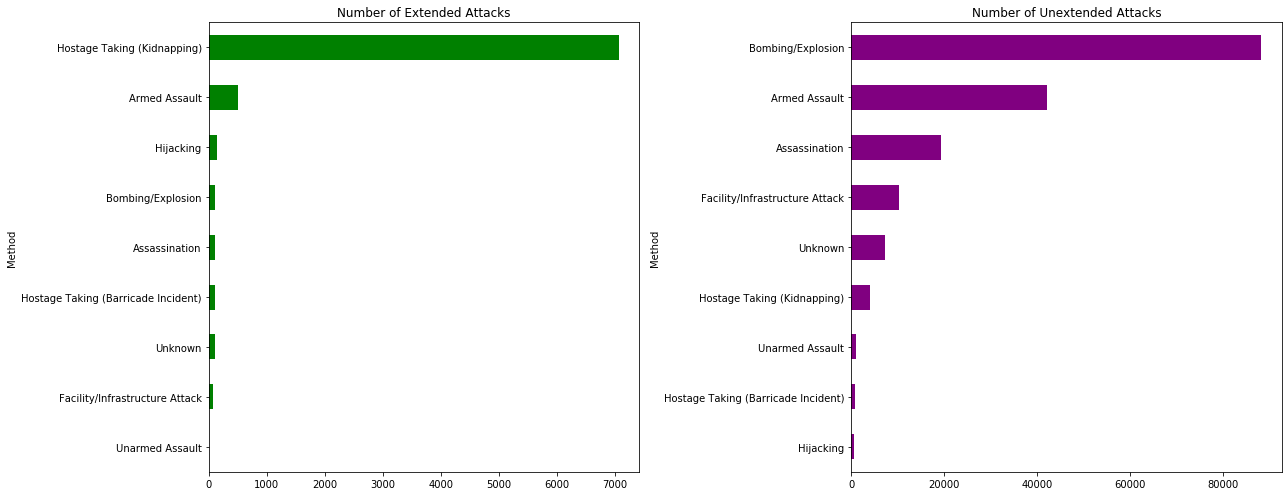

In [64]:
fig,ax = plt.subplots(figsize=(18,7),nrows=1,ncols=2)
ax[0]=df[df['Extended']==1].groupby('AttackType').count()['Extended'].sort_values().plot.barh(color='green',ax=ax[0])
ax[1]=df[df['Extended']==0].groupby('AttackType').count()['Extended'].sort_values().plot.barh(color='purple',ax=ax[1])
ax[0].set_title('Number of Extended Attacks')
ax[0].set_ylabel('Method')
ax[1].set_title('Number of Unextended Attacks')
ax[1].set_ylabel('Method')
plt.tight_layout()
plt.show()

Extended attacks overwhelmingly consist of hostage-taking. On the other hand, extended attacks seem to be a bit more spread between bombings/explosions, armed assaults, and assassinations.

#### Death and Injuries at all times

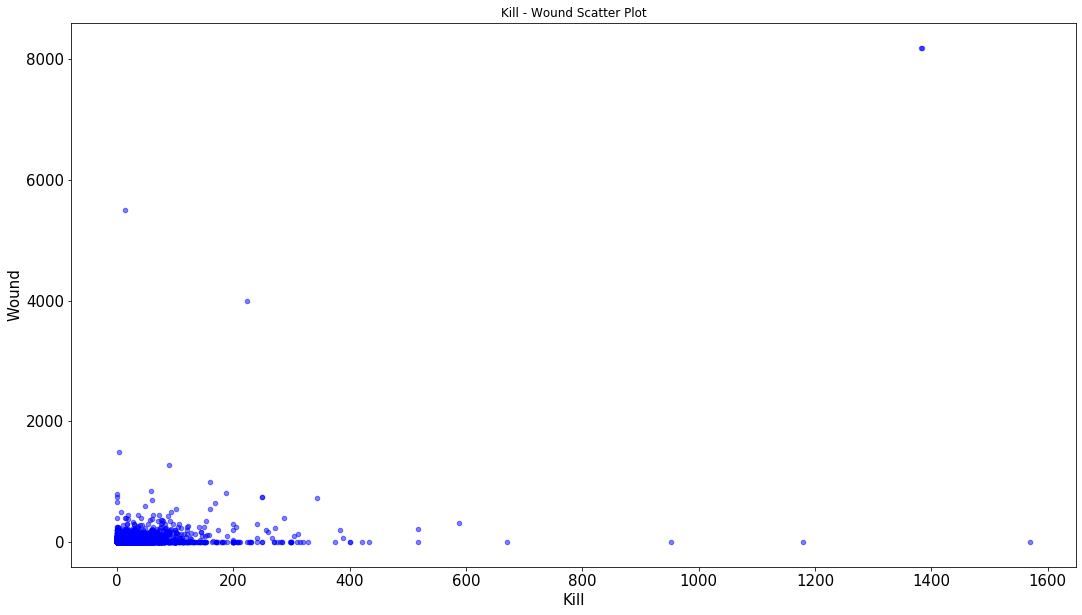

In [49]:
df.plot(kind = 'scatter', x = 'Killed', y = 'Wounded', alpha = 0.5, color = 'blue', figsize = (18,10), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()

#### ANALYSIS ON CUSTOMIZED DATA

##### Terrorist Attacks of a Particular year and their Locations

In [50]:
import folium
from folium.plugins import MarkerCluster 

Let's look at the terrorist acts in the world over a certain year.

In [51]:
filterYear = df['Year'] == 1970

In [52]:
filterData = df[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()

In [65]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

>Most of the terrorist attacks in 1970 were carried out on the American continent. 

>In 1970, the Middle East and North Africa was the center of wars and terrorist attacks, faced only one terrorist attack.

**Total Number of people killed in terror attack**`

In [54]:
killData = df.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 411868


**Let's look at what types of attacks these deaths were made of.**

In [55]:
attackData = df.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [56]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297,24920,157321,3642,3718,4478,24231,880,32381


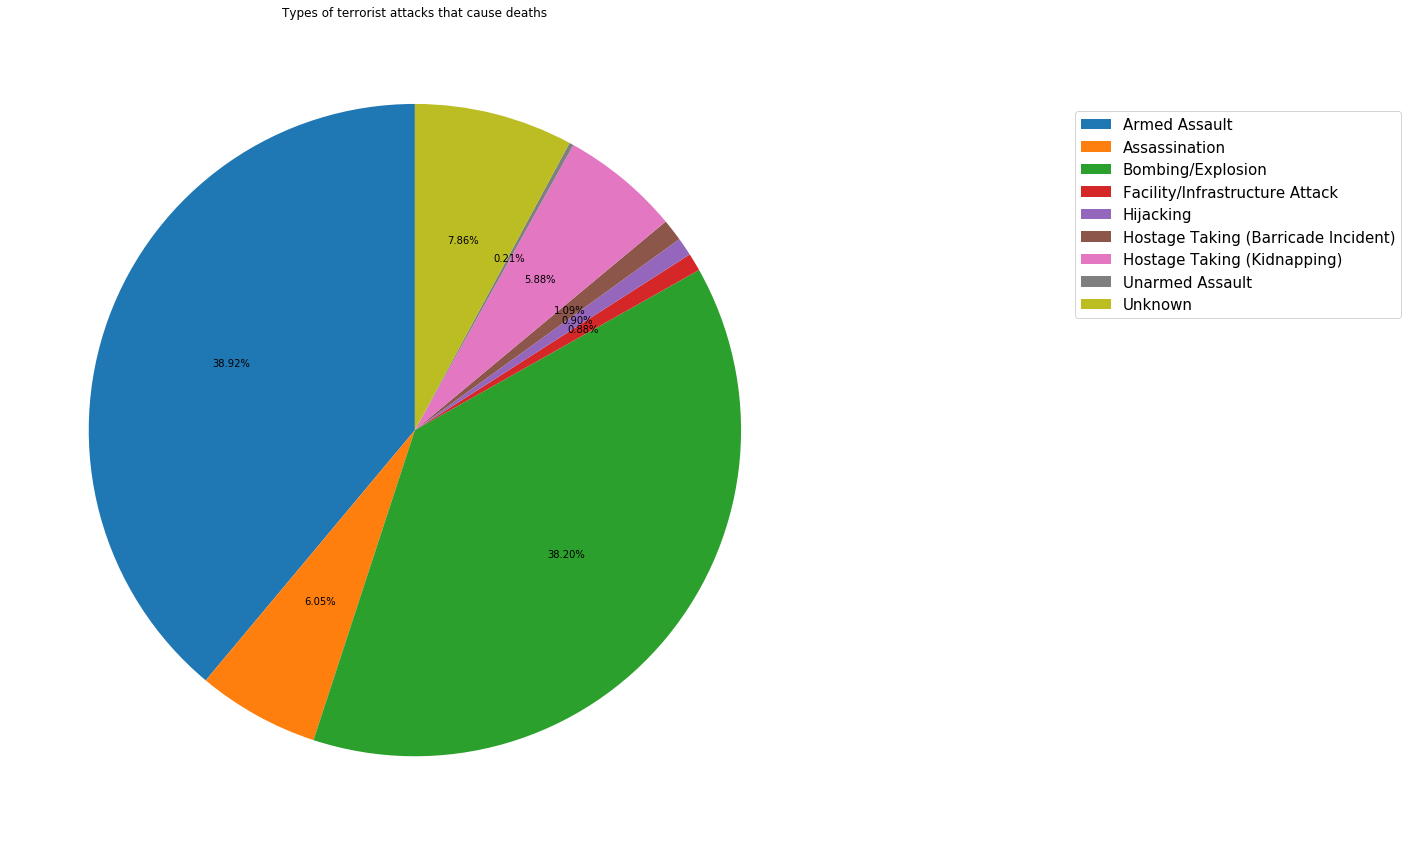

In [57]:
labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, bbox_to_anchor = (1.3, 0.9), fontsize=15) # location legend
plt.show()

### References

https://www.shutterstock.com/video/clip-29921728-terrorism-animated-word-cloud-text-design-animation

### Conclusion

#### I'm successfully able to caried out Exploratory Data Analysis and able to find out the hot zone of terrorism.

### Thanks :)